In [1]:
from huggingface_hub import hf_hub_download
import pandas as pd
import h5py
import numpy as np
hf_hub_download(repo_id="benmoseley/ese-dl-2024-25-group-project", filename="surprise_task3.h5", repo_type="dataset", local_dir="data")
hf_hub_download(repo_id="benmoseley/ese-dl-2024-25-group-project", filename="surprise_events3.csv", repo_type="dataset", local_dir="data")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


surprise_task3.h5:   0%|          | 0.00/135M [00:00<?, ?B/s]

surprise_events3.csv:   0%|          | 0.00/9.85k [00:00<?, ?B/s]

'data/surprise_events3.csv'

In [2]:
with h5py.File(f'data/surprise_task3.h5','r') as f:
    event = {img_type: f["S848806"][img_type][:] for img_type in ['vis', 'ir069', 'ir107', 'vil']}
for img_type in event:
    print(f"{img_type}: {event[img_type].shape} ({event[img_type].dtype})")

vis: (384, 384, 36) (int16)
ir069: (192, 192, 36) (int16)
ir107: (192, 192, 36) (int16)
vil: (384, 384, 36) (uint8)


In [2]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import numpy as np
import os
import pandas as pd

import torch
import torch.nn.functional as F
from torch.utils.data import  DataLoader
import sys
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_copied = '/content/drive/MyDrive/ACDS-Barry/barry'
sys.path.append(path_copied)
from common_functions import load_event
from task_3 import LightningDatasetClass, train_transform,plot_storm_images, train_model, UNet, DiceLoss, plot_model_predictions, get_data_loader,plot_model_predictions_and_extract_events, interpolate_lightning_times, create_gif_model_predictions

The process of creating a DataLoader for test images differs from the DataClass used in the previous notebook, as there are no target values available to guide or evaluate the output. However, the test images still undergo the same preprocessing steps as the training dataset to ensure consistency in input formatting.

In [7]:
dataset = LightningDatasetClass(event,frame_idx=0,project_path='p',transform= train_transform)
loader = DataLoader(dataset, shuffle=True)
images = next(iter(loader))

Here, I load the model trained over the past week with numerous epochs and a high number of events.

In [8]:
model = UNet(in_channels=4, out_channels=1)
model.load_state_dict(torch.load("/content/drive/MyDrive/ACDS-Barry/lightning_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))


<All keys matched successfully>

Given the images of the VIL band, we can observe the storm predictions generated by our U-Net model. The model appears to successfully cover all regions where red zones indicate areas prone to potential thunderstorms.

Later in this file, you will see a GIF of all frames combined, providing a better understanding of the overall trend. ⛈️

In [9]:
df_lightning = plot_model_predictions_and_extract_events(model, event, project_path = 'p', transform=train_transform)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Function explained in the file task_3.py
df_final = interpolate_lightning_times(df_lightning)
df_final

,time_sec,x,y
0,0.000000,297,83
1,0.320513,298,83
2,0.641026,299,83
3,0.961538,300,83
4,1.282051,296,84
...,...,...,...
12816,10798.907104,72,317
12817,10799.180328,71,318
12818,10799.453552,72,318
12819,10799.726776,71,319


In [ ]:
# lightning_array = df_final.to_numpy()
# save_directory = "/content/drive/MyDrive/ACDS-Barry/predictions/"
# file_name = 'barry-task3-lght-S848806.npy'
# save_path = save_directory+file_name

# np.save(save_path, lightning_array)

# print(f"✅ Saved to {save_path}")

✅ Saved to /content/drive/MyDrive/ACDS-Barry/predictions/barry-task3-lght-S848806.npy


⚡ The GIF below illustrates how lightning predictions change over time in terms of location 🌍. This helps visualize the model’s ability to track storm activity dynamically ⛈️📊.

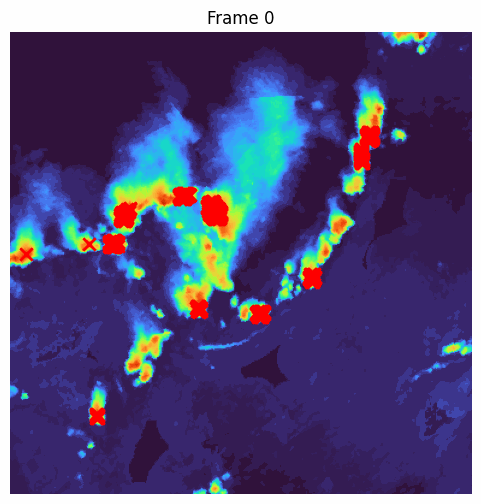

In [11]:
create_gif_model_predictions(model, event, project_path='p', transform=train_transform)